In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the dataset
breast_cancer_data = load_breast_cancer()

# Create feature and target variables
X = breast_cancer_data.data
y = breast_cancer_data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data loaded and split successfully.")
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Data loaded and split successfully.
Shape of X_train: (455, 30)
Shape of X_test: (114, 30)
Shape of y_train: (455,)
Shape of y_test: (114,)


In [2]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression(solver='liblinear') # Using 'liblinear' solver for simplicity

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.


In [3]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
print("Predicted probabilities for the positive class generated successfully.")
print(f"Shape of y_pred_proba: {y_pred_proba.shape}")

Predicted probabilities for the positive class generated successfully.
Shape of y_pred_proba: (114,)


In [4]:
from sklearn.metrics import roc_curve, auc

# Compute FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Compute AUC
roc_auc = auc(fpr, tpr)

print("FPR, TPR, and AUC computed successfully.")
print(f"AUC: {roc_auc:.4f}")

FPR, TPR, and AUC computed successfully.
AUC: 0.9977


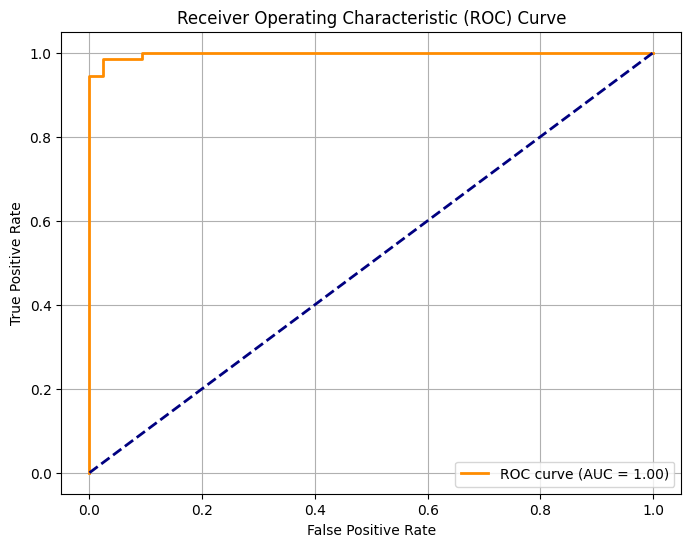

In [5]:
import matplotlib.pyplot as plt

# Create a new figure and axes object
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the ROC curve
ax.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

# Add a diagonal dashed line
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

# Set labels and title
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')

# Add legend and grid
ax.legend(loc='lower right')
ax.grid(True)

# Display the plot
plt.show()